# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
# import deltas
import model_deltas
import models

## Get data

In [2]:
N1 = 10000
N2 = 10
data_clf = pipeline.get_data(
    m1=[-5, -5],
    m2=[10, 10],
    cov1=[[10, 0], [0, 10]],
    cov2=[[50, 0], [0, 50]],
    N1=N1,
    N2=N2,
    scale=True)


## Get Classifier

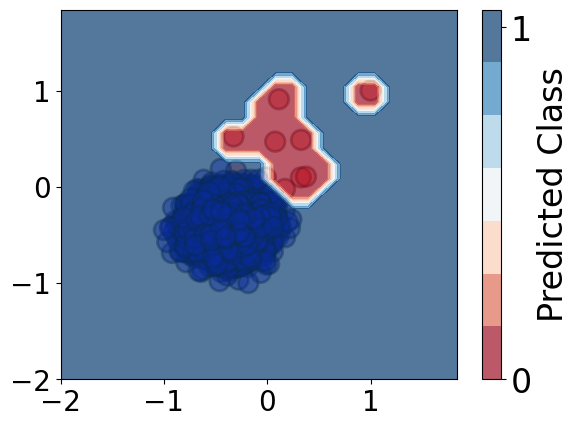

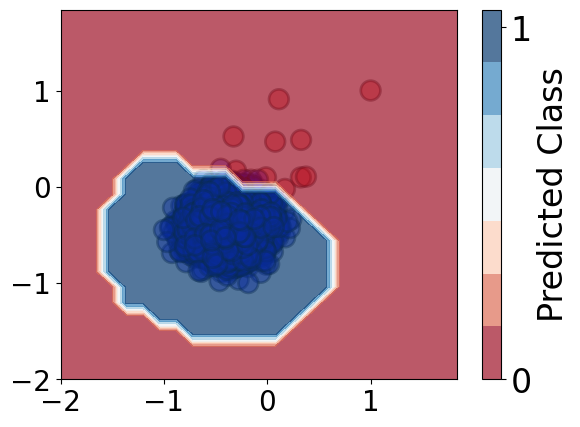

In [3]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'], clf_SMOTE = pipeline.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [4]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[1.00000033]])

## Fit deltas

deltas init: [1, 0.00704136713933485]
eq. 7 can be satisfied: True
constraint init: True
Grid Search Optimisation Complete
    delta1 : 0.001001001001002 
    delta2: 0.010124114930083371
    constraint satisfied: True


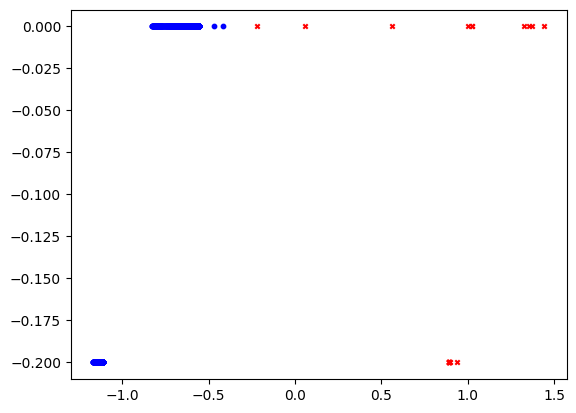

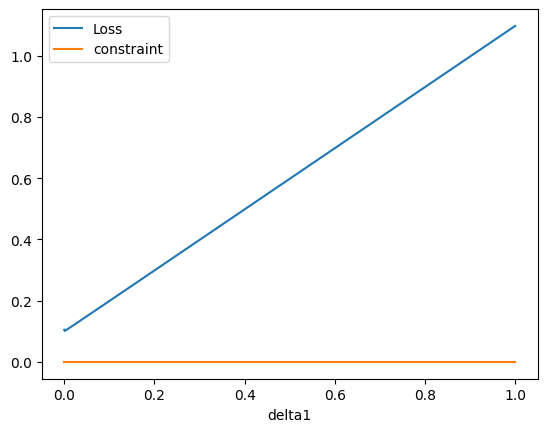

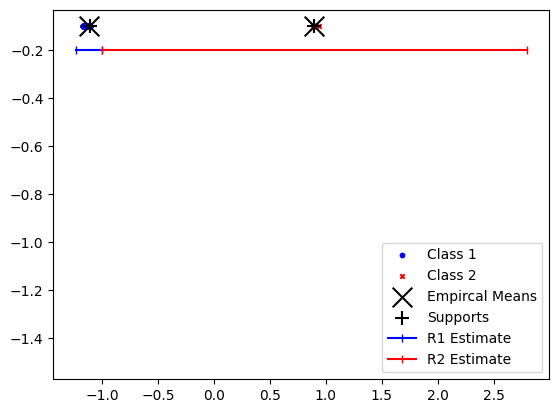

In [5]:
X = data_clf['data']['X']
y = data_clf['data']['y']
deltas_model = model_deltas.reprojection_deltas(
    clf,
    projection_model=model_deltas.reprojectioner(projecter=models.SVM(kernel='rbf'))
    ).fit(X, y, _print=True, _plot=True)

## Plot training data information

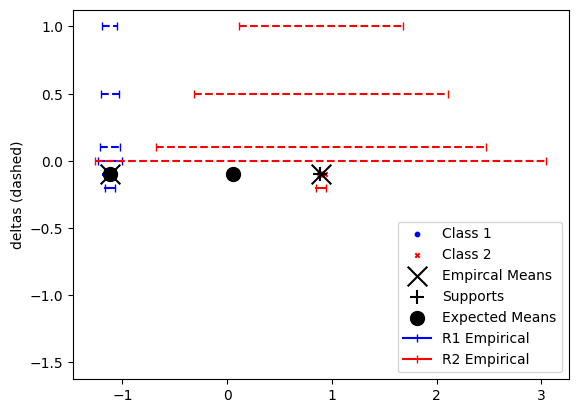

In [6]:
deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])

## Show parameters

In [7]:
deltas_model.print_params()

Parameters
                R:  1.1663515059689202
                N1: 10000
                N2: 10
                R1: 0.04824207946178172
                R2: 0.04319316401554907
                M:  1.9995464457277
                D:  2.013630440807721
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.75415
SMOTE accuracy: 0.96345
deltas accuracy: 0.9697

original F1: 0.6740038453888484
SMOTE F1: 0.9620752269779508
deltas F1: 0.9687725445738431

original precision0: 0.6703760809814305
SMOTE precision0: 0.9321212121212121
deltas precision0: 0.9433641683972059

original precision1: 1.0
SMOTE precision1: 0.9996765498652291
deltas precision1: 0.9993621092919414



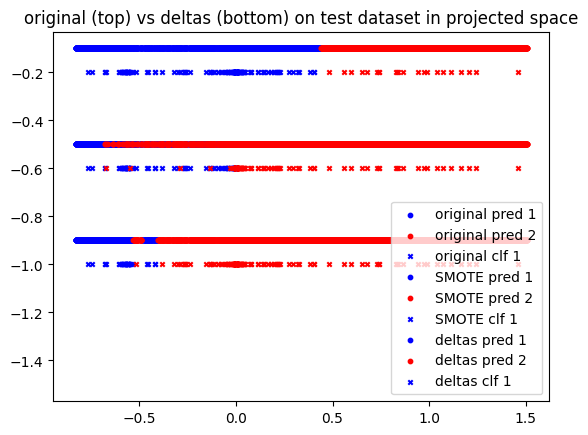

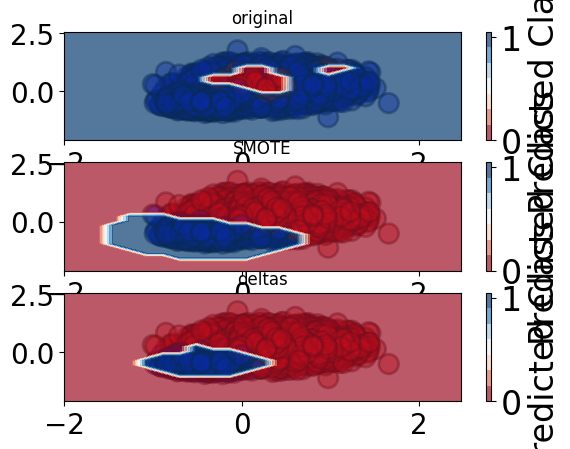

In [8]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
pipeline.eval_test_new(mdels,
                       data_clf['data_test'], _print=True, _plot=True)